In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [14]:
import logging

from daft_builder import PGM, Plate, Node, Data, Param, HyperParam

logging.basicConfig(level=logging.INFO)

## Latent Dirichlet Allocation

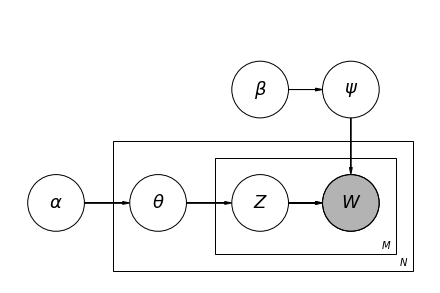

In [3]:
pgm = (PGM()
    .with_plate(Plate(r"$M$")
        .with_nodes(
            Data(r"$W$", xy=(3, 0.7)),
            Param(r"$Z$", left_of="W")))
    .with_plate(Plate(r"$N$")
        .with_nodes(
            Param(r"$\theta$", left_of="Z"),
            "Z", "W"))
    .with_nodes(
        Param(r"$\alpha$", left_of="theta"),
        Param(r"$\psi$", above="W"),
        Param(r"$\beta$", left_of="psi"))
).build()
pgm.render();

## Hierarchical Heteroskedastic Linear Regression

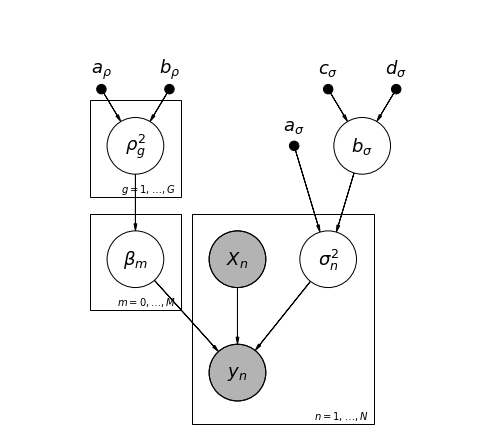

In [4]:
pgm = (PGM()
    .with_plate(Plate(r"$n = 1, \ldots, N$")
        .with_nodes(
            Data(r"$y_n$", xy=(2, 0.5), scale=2),
            Data(r"$X_n$", above="y_n")
                .with_edges_to("y_n"),
            Param(r"$\sigma_n^2$", right_of="X_n", of="y_n")))
    .with_plate(Plate(r"$m = 0, \ldots, M$")
        .with_nodes(
            Param(r"$\beta_m$", left_of="X_n", of="y_n")))
    .with_nodes(
        HyperParam(r"$a_\sigma$", above_l="sigma_n_sq"),
        Param(r"$b_\sigma$", above_r="sigma_n_sq"),
        HyperParam(r"$c_\sigma$", above_l="b_sigma", shift_y=-0.5),
        HyperParam(r"$d_\sigma$", above_r="b_sigma", shift_y=-0.5))
    .with_plate(Plate(r"$g = 1, \ldots, G$")
        .with_nodes(
            Param(r"$\rho_g^2$", above="beta_m")))
    .with_nodes(
        HyperParam(r"$a_\rho$", above_l="rho_g_sq", shift_y=-0.5),
        HyperParam(r"$b_\rho$", above_r="rho_g_sq", shift_y=-0.5))
).build()
pgm.render();

## Probabilistic Matrix Factorization

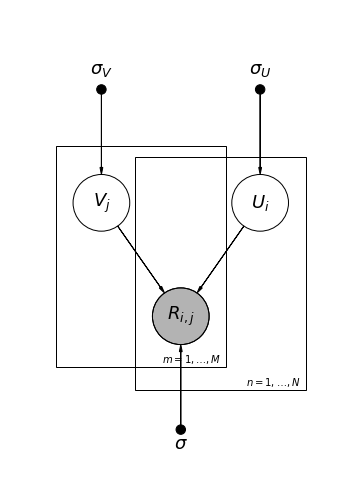

In [7]:
pgm = (PGM()
    .with_plate(Plate(r"$m = 1, \ldots, M$")
        .with_nodes(
            Data(r"$R_{i, j}$", xy=(1.5, 1.5)),
            Param(r"$V_j$", above_l="R_ij", shift_x=-0.4)))
    .with_plate(Plate(r"$n = 1, \ldots, N$")
        .with_nodes(
            "R_ij",
            Param(r"$U_i$", above_r="R_ij", shift_x=0.4)))
    .with_nodes(
        HyperParam(r"$\sigma_V$", above="V_j"),
        HyperParam(r"$\sigma_U$", above="U_i"),
        HyperParam(r"$\sigma$", below="R_ij"))
).build()
pgm.render();

## Classic Cloudy/Rain/Sprinkler/Wet Graph

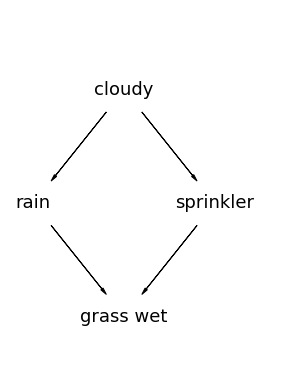

In [21]:
pgm = (PGM(node_ec="none")
    .with_nodes(
        Node("grass wet", xy=(1.0, 0.5)),
        Param("rain", above_l="grass wet", shift_x=-0.5),
        Param("sprinkler", above_r="grass wet", shift_x=0.5),
        Param("cloudy", above_r="rain", shift_x=0.5, of=["rain", "sprinkler"]))
).build()
pgm.render();

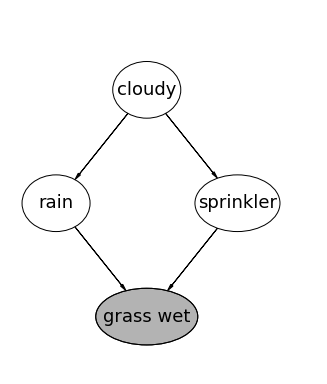

In [28]:
pgm = (PGM()
    .with_nodes(
        Data("grass wet", xy=(1.2, 0.5), aspect=1.8),
        Param("rain", above_l="grass wet", shift_x=-0.5, aspect=1.2),
        Param("sprinkler", above_r="grass wet", shift_x=0.5, aspect=1.5),
        Param("cloudy", above_r="rain", shift_x=0.5,
              of=["rain", "sprinkler"], aspect=1.2))
).build()
pgm.render();